In [167]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

from dataset import get_dataset

In [168]:
df_train, df_test = get_dataset()

In [169]:
# There are 5 unique values for the hour
print(df_train['hour'].unique())

['06:00:00' '07:00:00' nan '08:00:00' '09:00:00' '11:00:00']


In [170]:
# Print number of stations
stations = df_train['station'].unique()
print(stations)
print("Number of stations:", len(stations))

['AD' 'AI' 'AJ' 'AK' 'AM' 'AT' 'AW' 'AX' 'BB' 'BD' 'BE' 'AE' 'AL' 'AO'
 'AQ' 'BC' 'AB' 'AN' 'AS' 'BF' 'BG' 'BH' 'AV' 'AF' 'AP' 'AZ' 'AA' 'AC'
 'AG' 'AH' 'AR' 'AU' 'BA' 'BI' 'BJ' 'AY']
Number of stations: 36


In [171]:
# Print number of row for each station:
stations_map = {}
for station in stations:
    stations_map[station] = len(df_train[df_train['station'] == station])

# Order the stations by number of rows
sorted_stations = sorted(stations_map.items(), key=lambda x: x[1], reverse=True)
print(sorted_stations)

[('AJ', 3204), ('BB', 2609), ('AK', 1881), ('AI', 1880), ('AZ', 1323), ('AQ', 1259), ('AL', 1257), ('AO', 1257), ('BC', 1257), ('AF', 674), ('AP', 674), ('AE', 665), ('BG', 652), ('AU', 651), ('AC', 649), ('AG', 649), ('AH', 649), ('AD', 621), ('AM', 621), ('AT', 621), ('AW', 621), ('AX', 621), ('BE', 621), ('BD', 618), ('AB', 594), ('BF', 594), ('BH', 594), ('AS', 593), ('AV', 587), ('AN', 586), ('AA', 347), ('AR', 347), ('BJ', 347), ('BA', 346), ('BI', 346), ('AY', 304)]


# Stations visualization

In [172]:
# Cast from hh:mm:ss to datetime and extract the hour, then convert to int
df_train['hour_num'] = pd.to_datetime(df_train['hour'], format='%H:%M:%S').dt.hour
df_test['hour_num'] = pd.to_datetime(df_test['hour'], format='%H:%M:%S').dt.hour

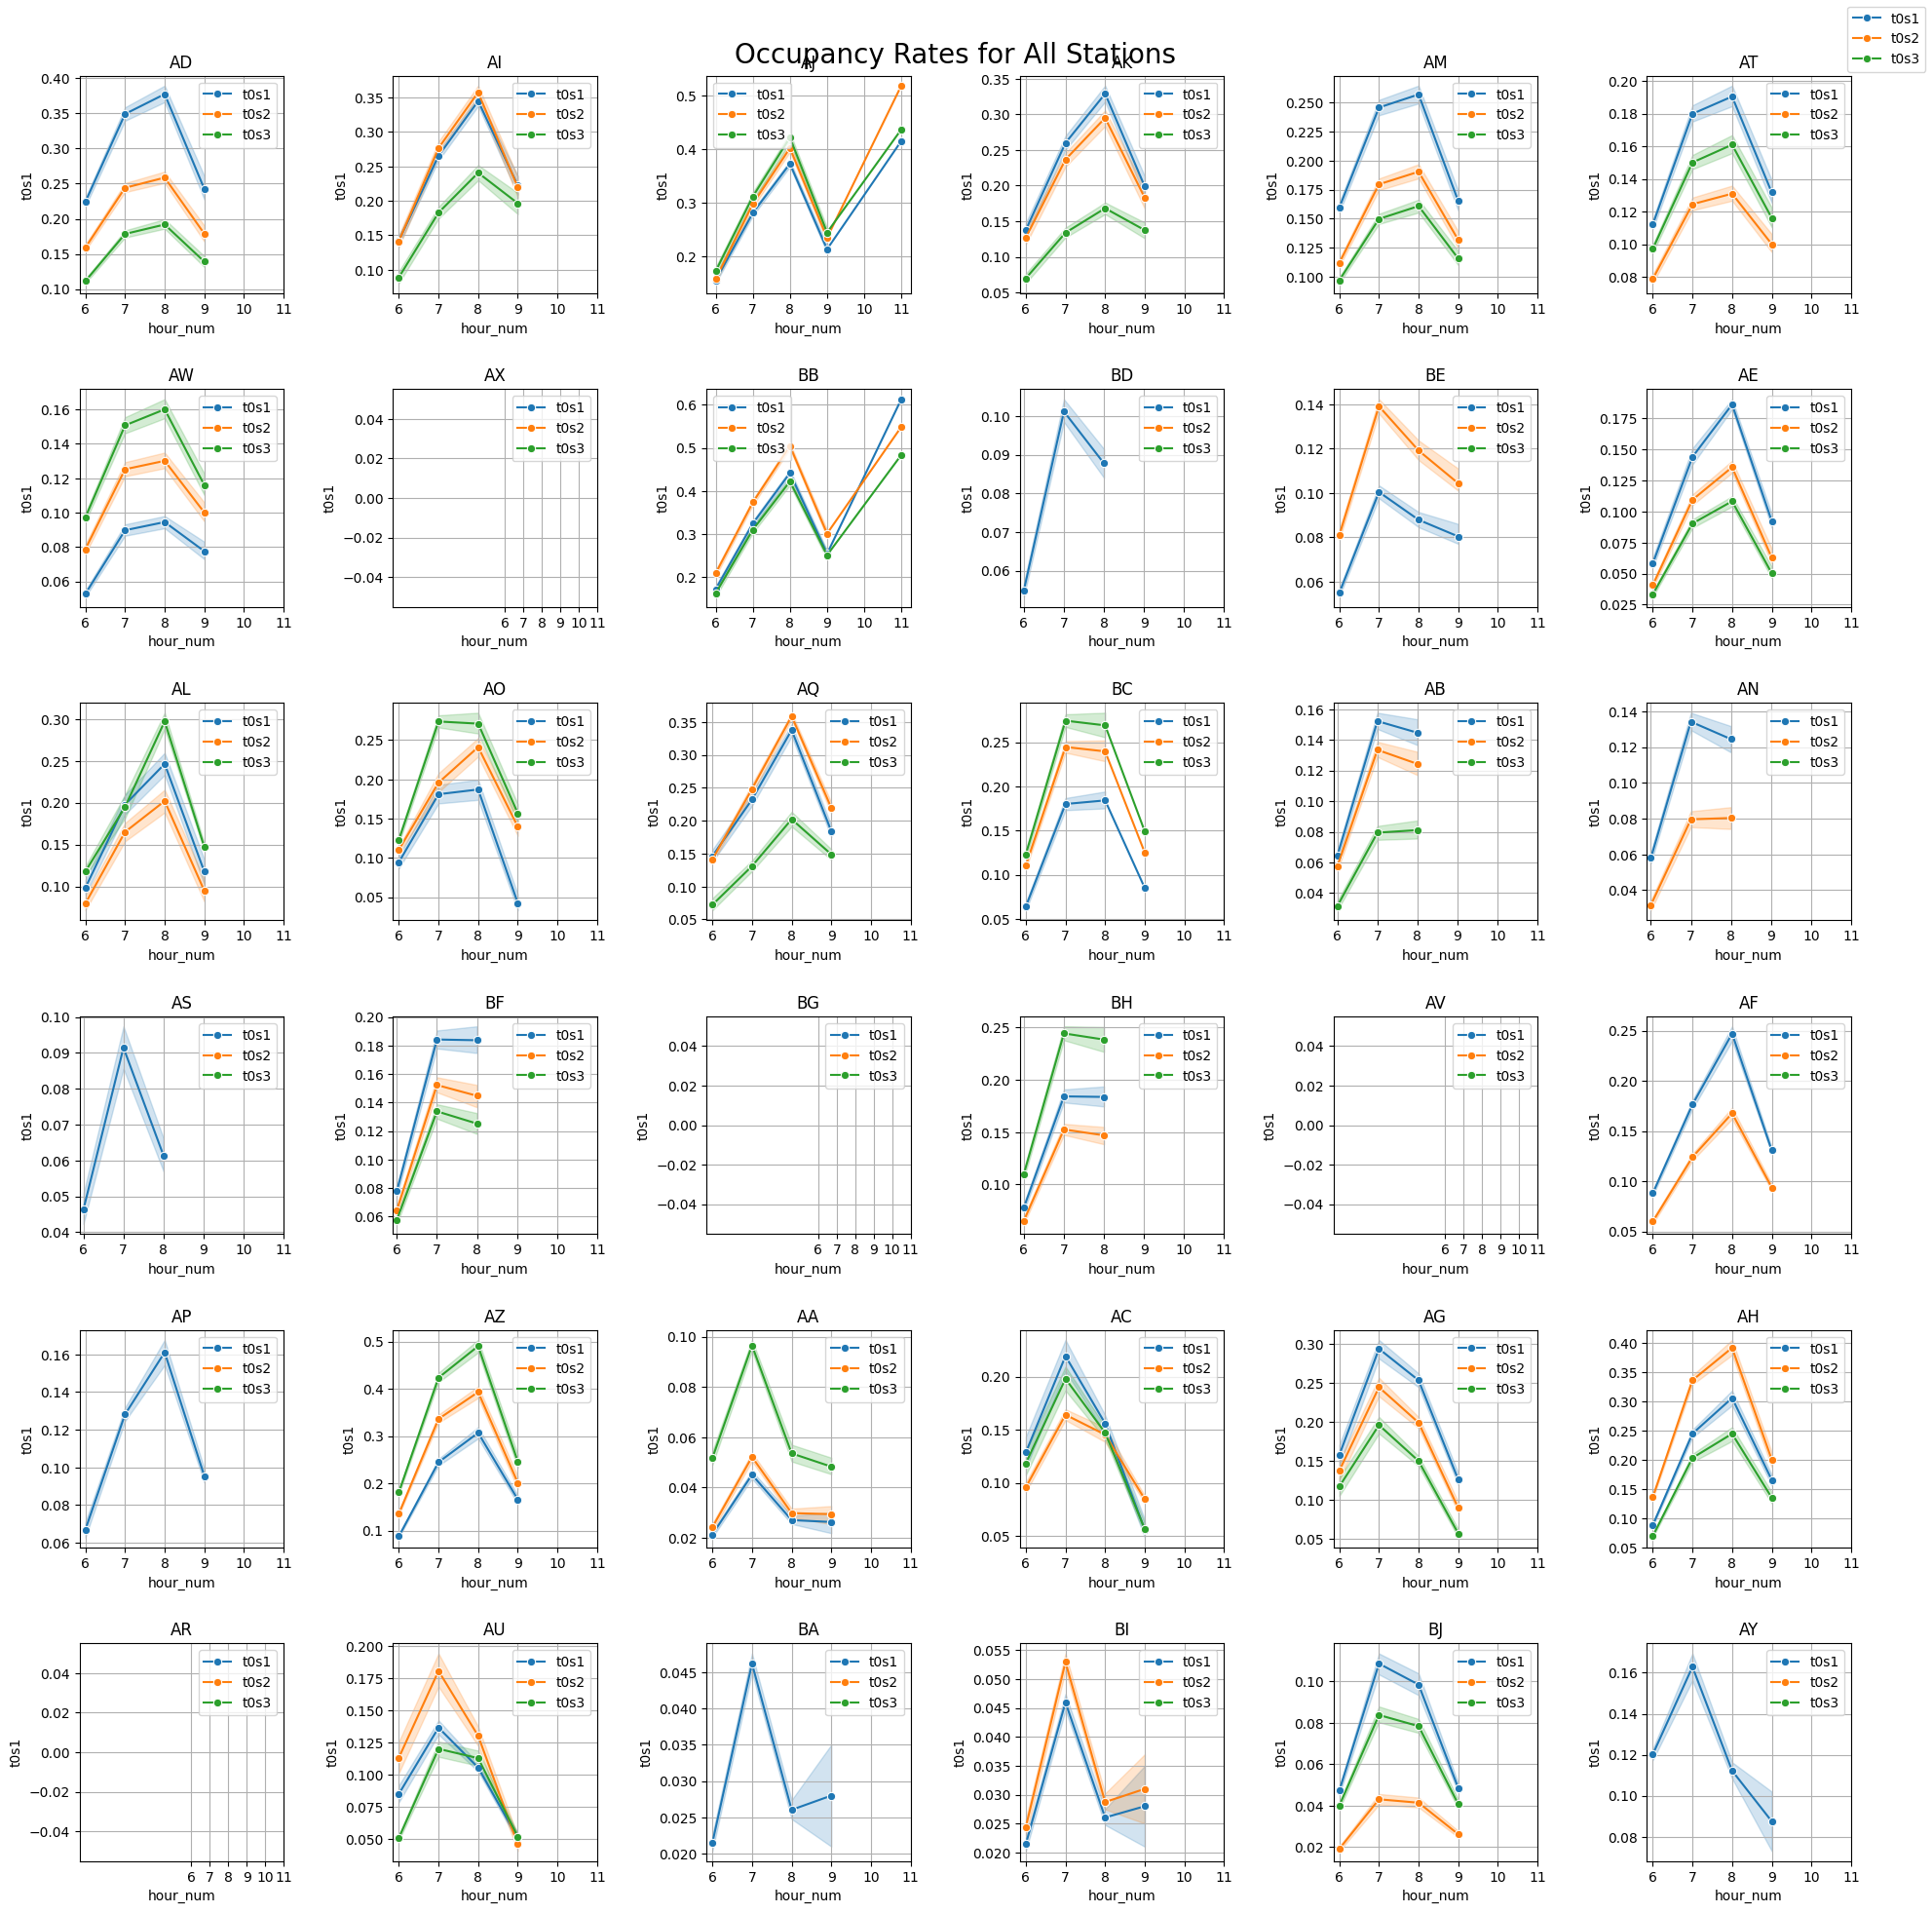

In [175]:
# Create plot grid
min_hour = df_train['hour_num'].min().astype(int)
max_hour = df_train['hour_num'].max().astype(int)

fig, axs = plt.subplots(6, 6, figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, station in enumerate(stations):
    row = i // 6
    col = i % 6
    filtered_df = df_train[df_train['station'] == station]

    sns.lineplot(data=filtered_df, x='hour_num', y='t0s1', marker='o', label='t0s1', ax=axs[row, col])
    sns.lineplot(data=filtered_df, x='hour_num', y='t0s2', marker='o', label='t0s2', ax=axs[row, col])
    sns.lineplot(data=filtered_df, x='hour_num', y='t0s3', marker='o', label='t0s3', ax=axs[row, col])
    axs[row, col].set_title(f'{station}')
    axs[row, col].set_xticks(range(min_hour, max_hour + 1))
    axs[row, col].grid(True)

# Set common title and legend
fig.suptitle('Occupancy Rates for All Stations', fontsize=20)
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()

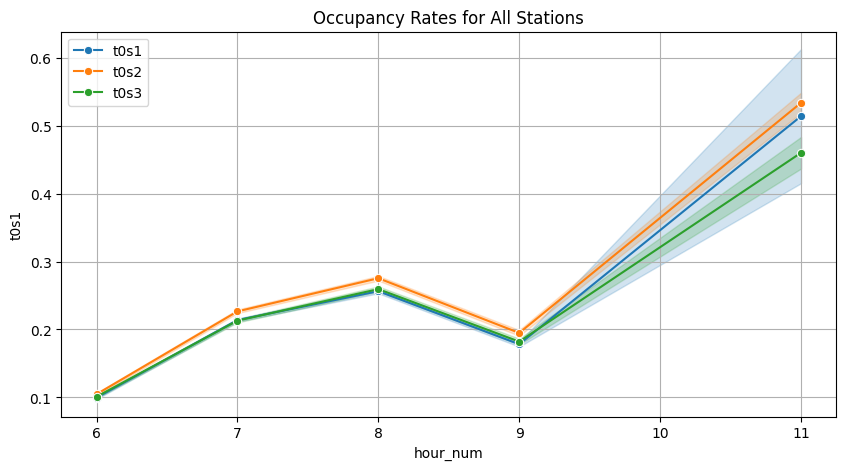

In [186]:
# Now one graph to see occupancy rates for all stations
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df_train, x='hour_num', y='t0s1', marker='o', label='t0s1')
sns.lineplot(data=df_train, x='hour_num', y='t0s2', marker='o', label='t0s2')
sns.lineplot(data=df_train, x='hour_num', y='t0s3', marker='o', label='t0s3')
ax.set_title('Occupancy Rates for All Stations')
ax.set_xticks(range(min_hour, max_hour + 1))
ax.grid(True)
plt.legend()

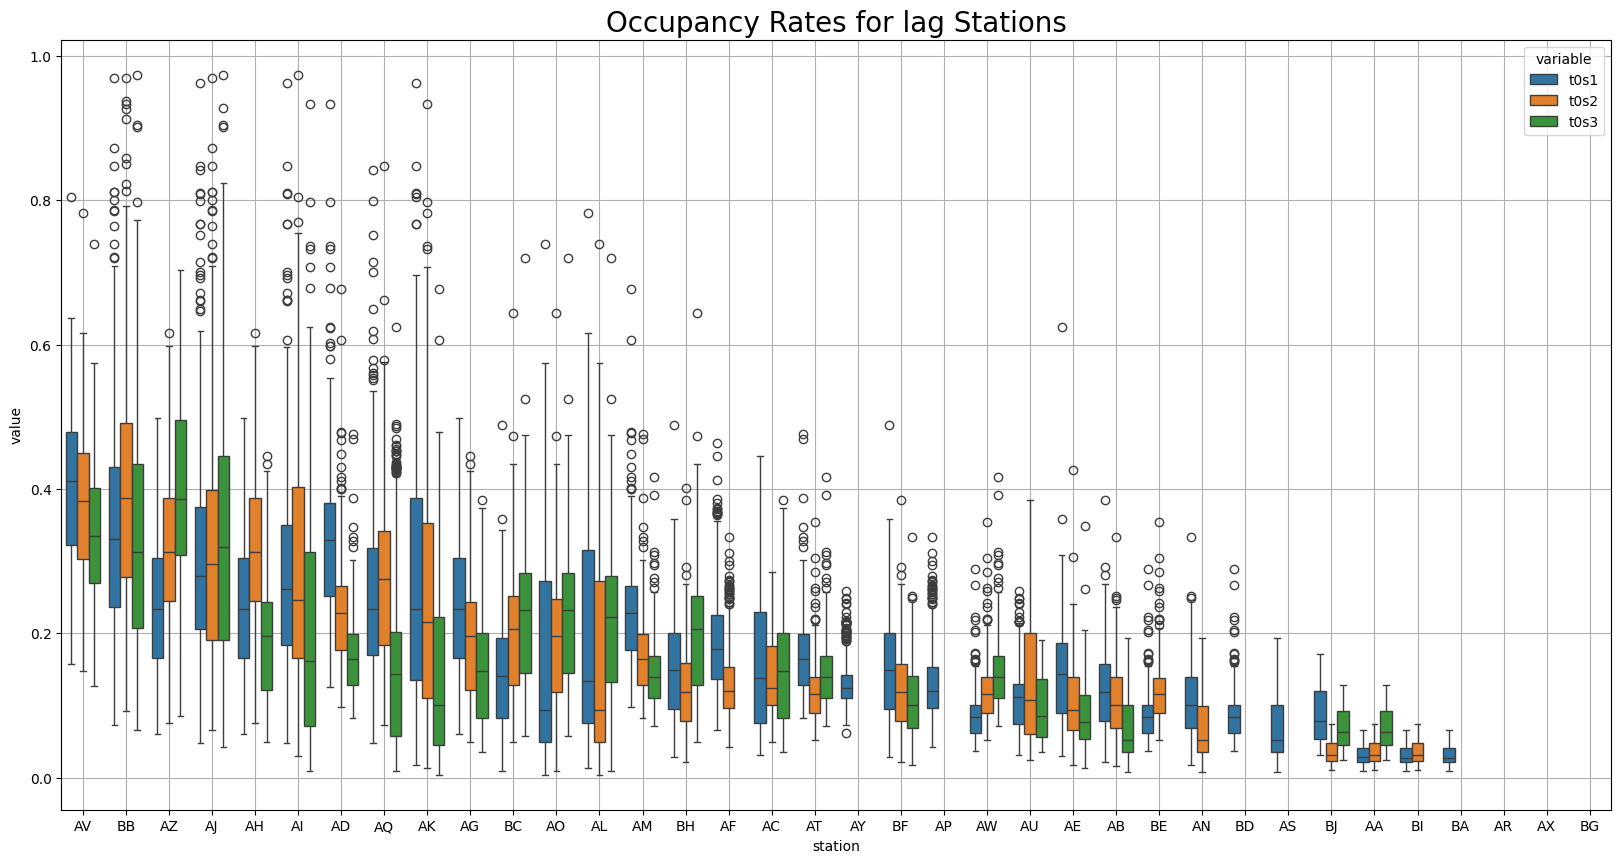

In [177]:
cols = ['t0s1', 't0s2', 't0s3']
sorted_stations_avg_station = df_train.groupby('station')[cols].mean()
sorted_stations_avg_station = sorted_stations_avg_station.mean(axis=1).sort_values(ascending=False)

# Melt the dataframe to have a long format suitable for seaborn boxplot
melted_df = df_train.melt(id_vars=['station'], value_vars=cols, var_name='variable', value_name='value')

# Print the occupancy rates for each station in a single box plot
plt.figure(figsize=(20, 10))
sns.boxplot(data=melted_df, x='station', y='value', hue='variable', order=sorted_stations_avg_station.index)
plt.title('Occupancy Rates for lag Stations', fontsize=20)
plt.grid(True)
plt.show()


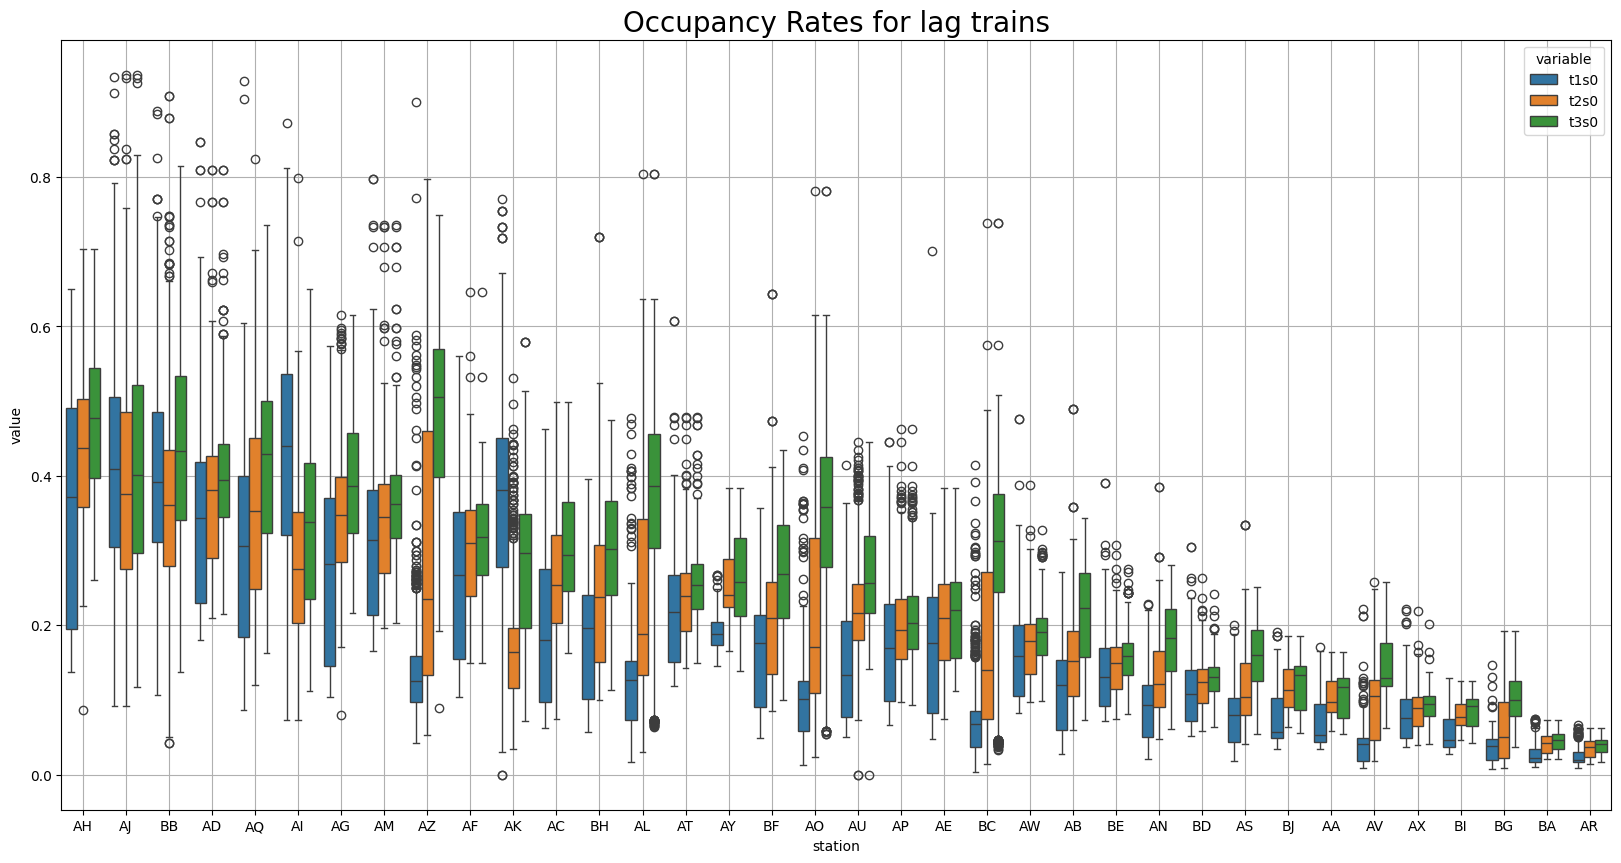

In [ ]:
cols = ['t1s0', 't2s0', 't3s0']
stations_lag_train = df_train.groupby('station')[cols].mean()
stations_avg_lag_train = stations_lag_train.mean(axis=1).sort_values(ascending=False)

# Melt the dataframe to have a long format suitable for seaborn boxplot
melted_df = df_train.melt(id_vars=['station'], value_vars=cols, var_name='variable', value_name='value')

# Print the occupancy rates for each station in a single box plot
plt.figure(figsize=(20, 10))
sns.boxplot(data=melted_df, x='station', y='value', hue='variable', order=stations_avg_lag_train.index)
plt.title('Occupancy Rates for lag trains', fontsize=20)
plt.grid(True)
plt.show()

In [179]:
# Replace station by its average occupancy rate with respect to the 3 lag stations and the 3 lag trains
df_train['station_avg_lag_train'] = df_train['station'].map(sorted_stations_avg_station)
df_train['station_avg_lag_station'] = df_train['station'].map(stations_avg_lag_train)

In [204]:
df_train['day_of_week'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d').dt.dayofweek

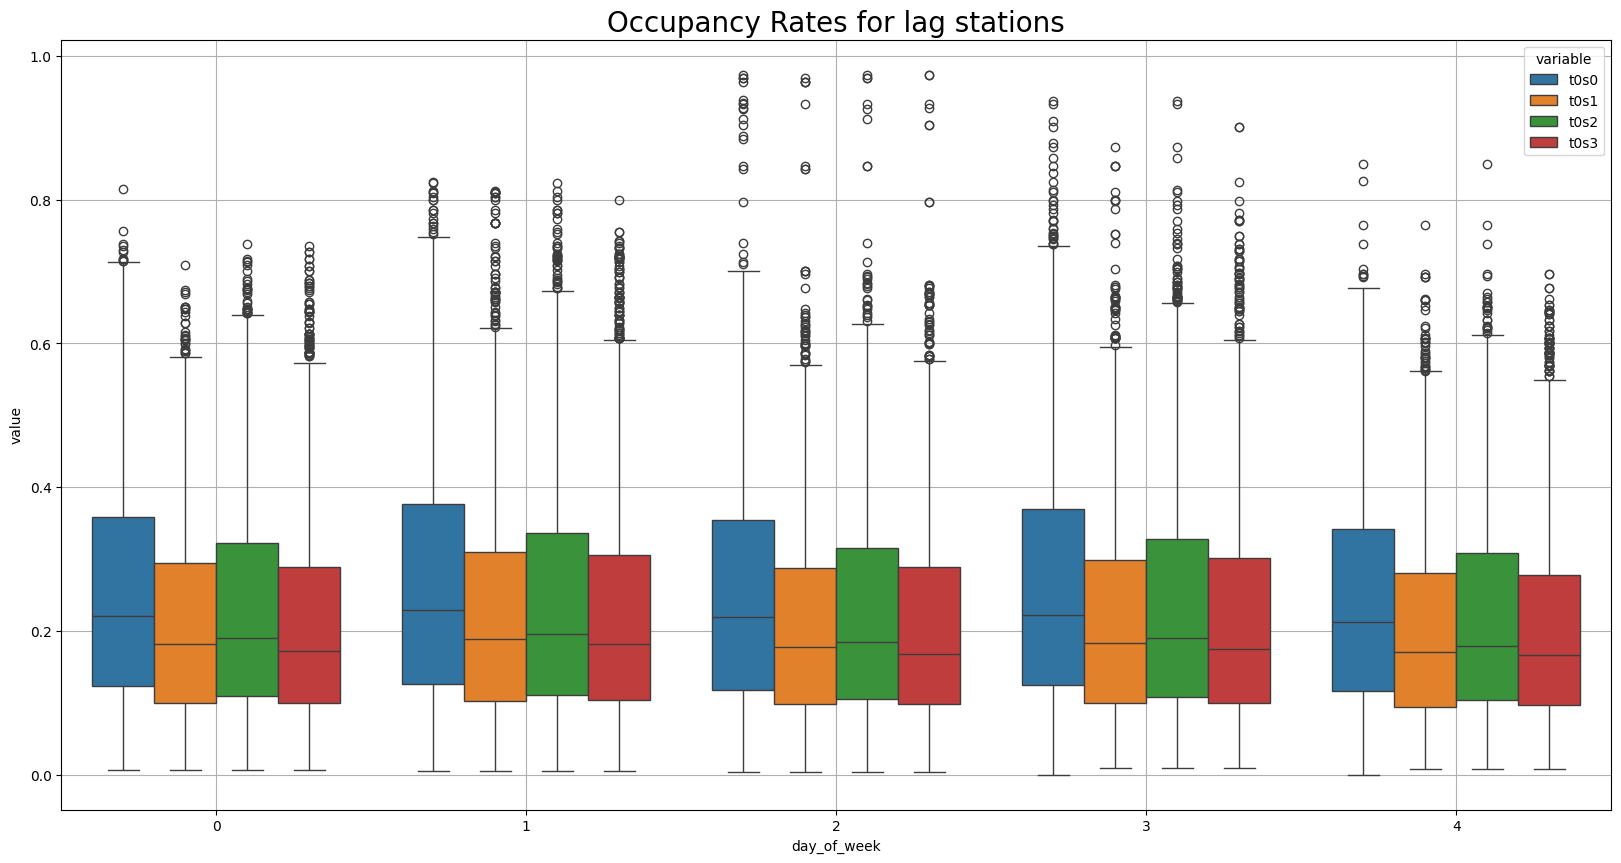

In [216]:
cols = ['t0s0', 't0s1', 't0s2', 't0s3']
# Melt the dataframe to have a long format suitable for seaborn boxplot
melted_df = df_train.melt(id_vars=['day_of_week'], value_vars=cols, var_name='variable', value_name='value')

# Print the occupancy rates for each station in a single box plot
plt.figure(figsize=(20, 10))
sns.boxplot(data=melted_df, x='day_of_week', y='value', hue='variable')
plt.title('Occupancy Rates for lag stations', fontsize=20)
plt.grid(True)
plt.show()

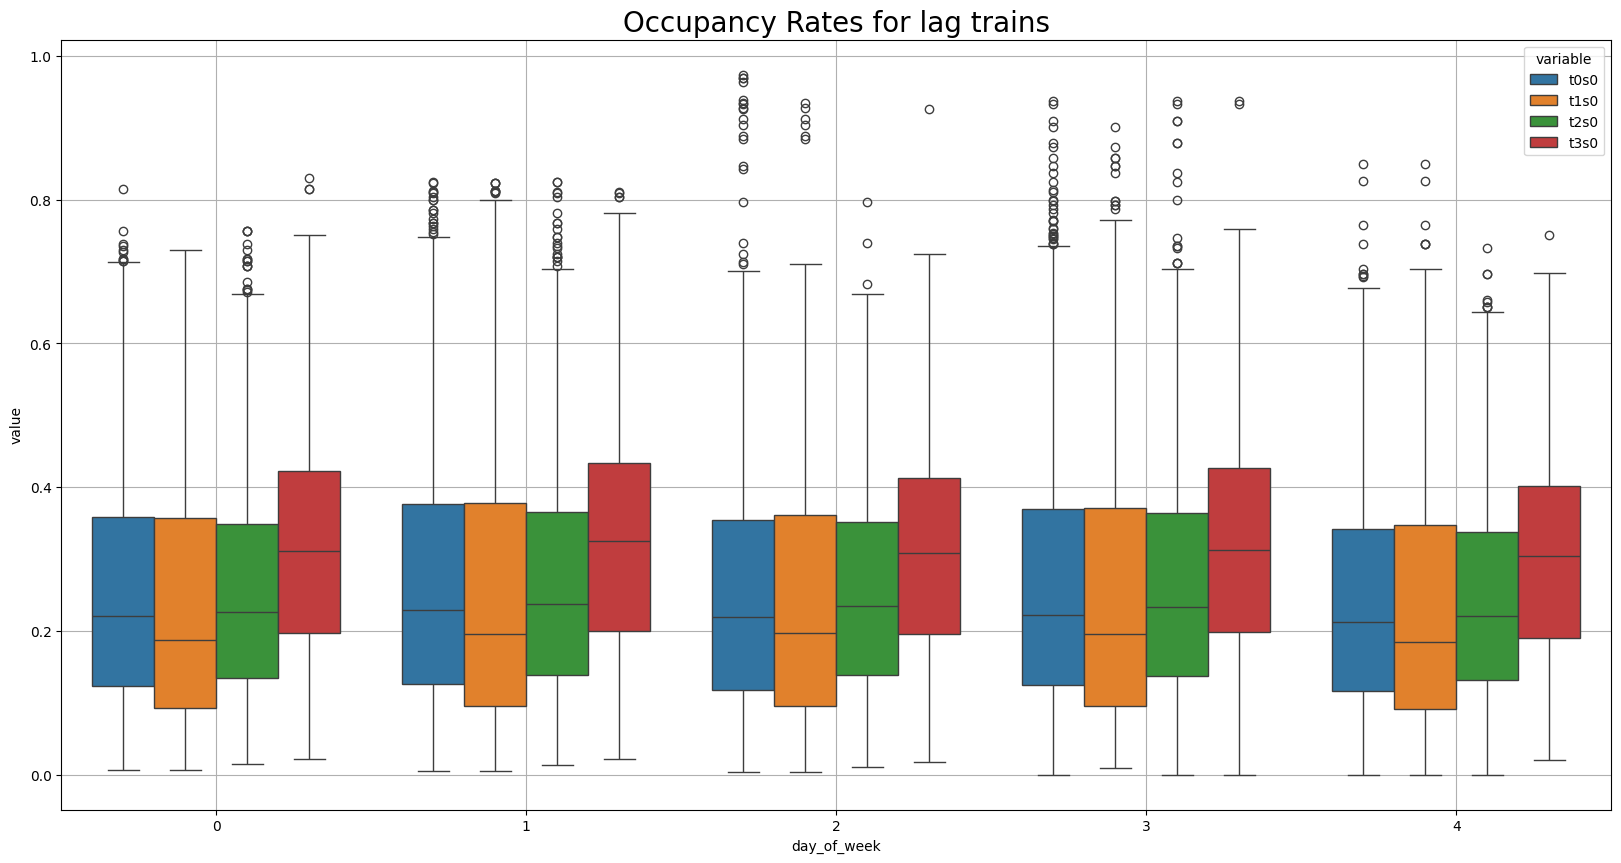

In [214]:
cols = ['t0s0', 't1s0', 't2s0', 't3s0']
# Melt the dataframe to have a long format suitable for seaborn boxplot
melted_df = df_train.melt(id_vars=['day_of_week'], value_vars=cols, var_name='variable', value_name='value')

# Print the occupancy rates for each station in a single box plot
plt.figure(figsize=(20, 10))
sns.boxplot(data=melted_df, x='day_of_week', y='value', hue='variable')
plt.title('Occupancy Rates for lag trains', fontsize=20)
plt.grid(True)
plt.show()

### Observations:
- Composition in the test set is constant equal to 2.
- way is constant equal to 1.

# Correlations


In [208]:
from pandas.plotting import scatter_matrix

lag_features = ['t1s0', 't2s0', 't3s0', 't0s1', 't0s2', 't0s3', 't0s0']
all_features = ['station_avg_lag_train',
                'station_avg_lag_station', 'day_of_week', 'hour_num'] + lag_features

<Figure size 2000x2000 with 0 Axes>

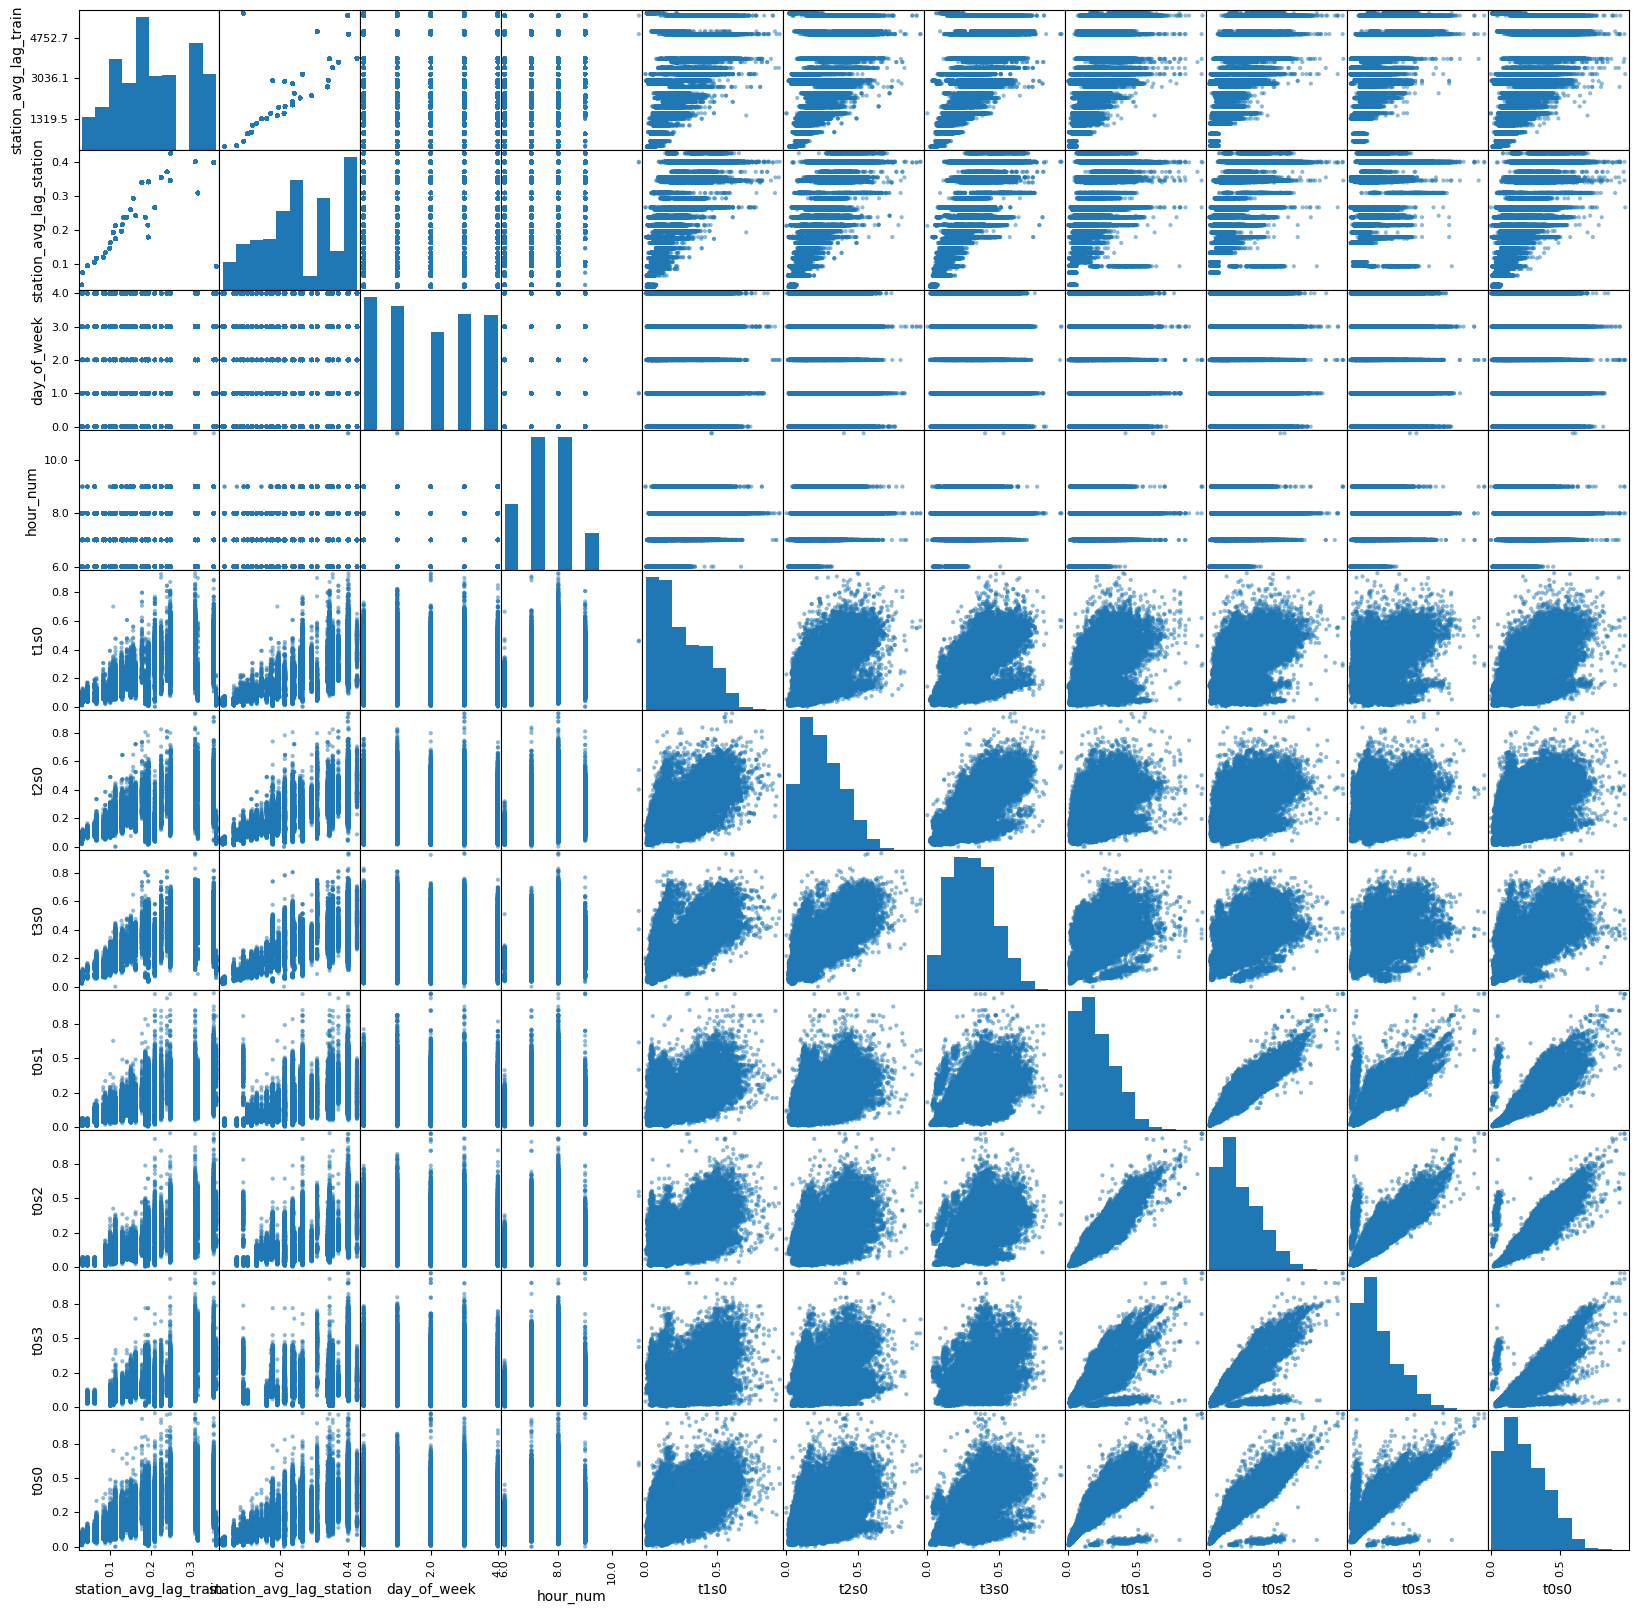

In [209]:
# Define the columns to plot


# Create the scatter matrix plot
plt.figure(figsize=(20, 20))
sm = scatter_matrix(df_train[all_features], figsize=(20, 20))

# Fix the axis labels to two decimal places
for ax in sm.ravel():
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}'))

plt.show()

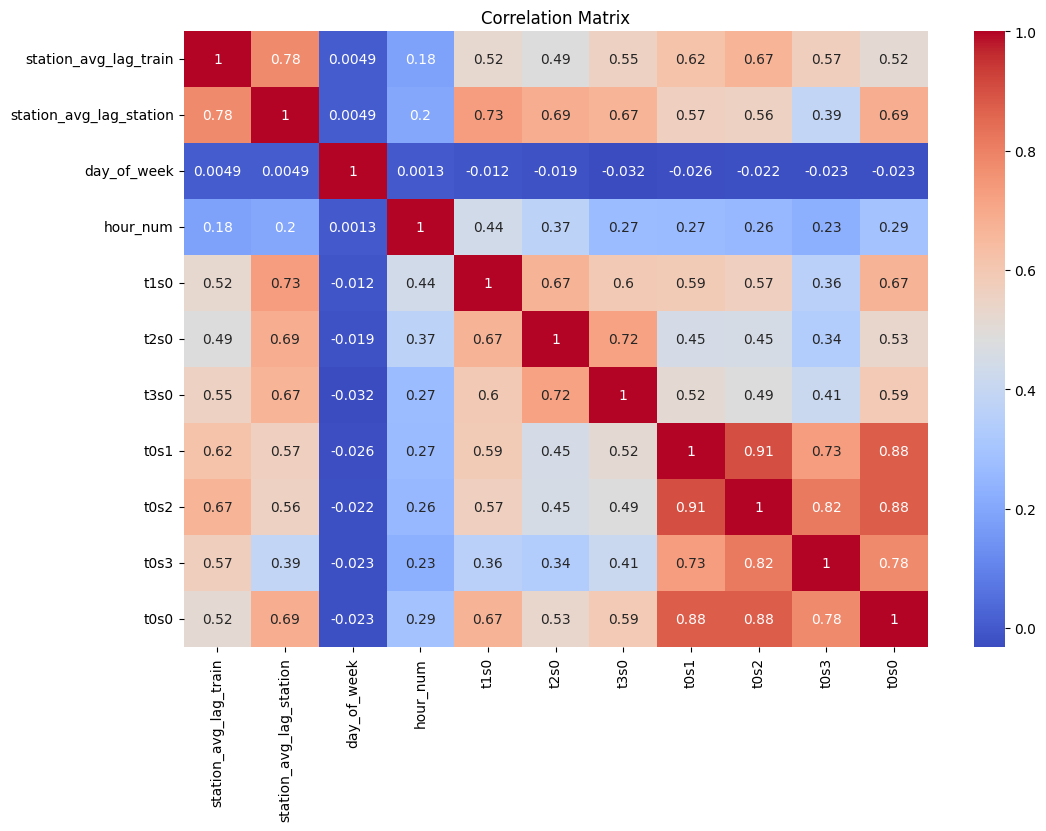

In [210]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[all_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 2000x2000 with 0 Axes>

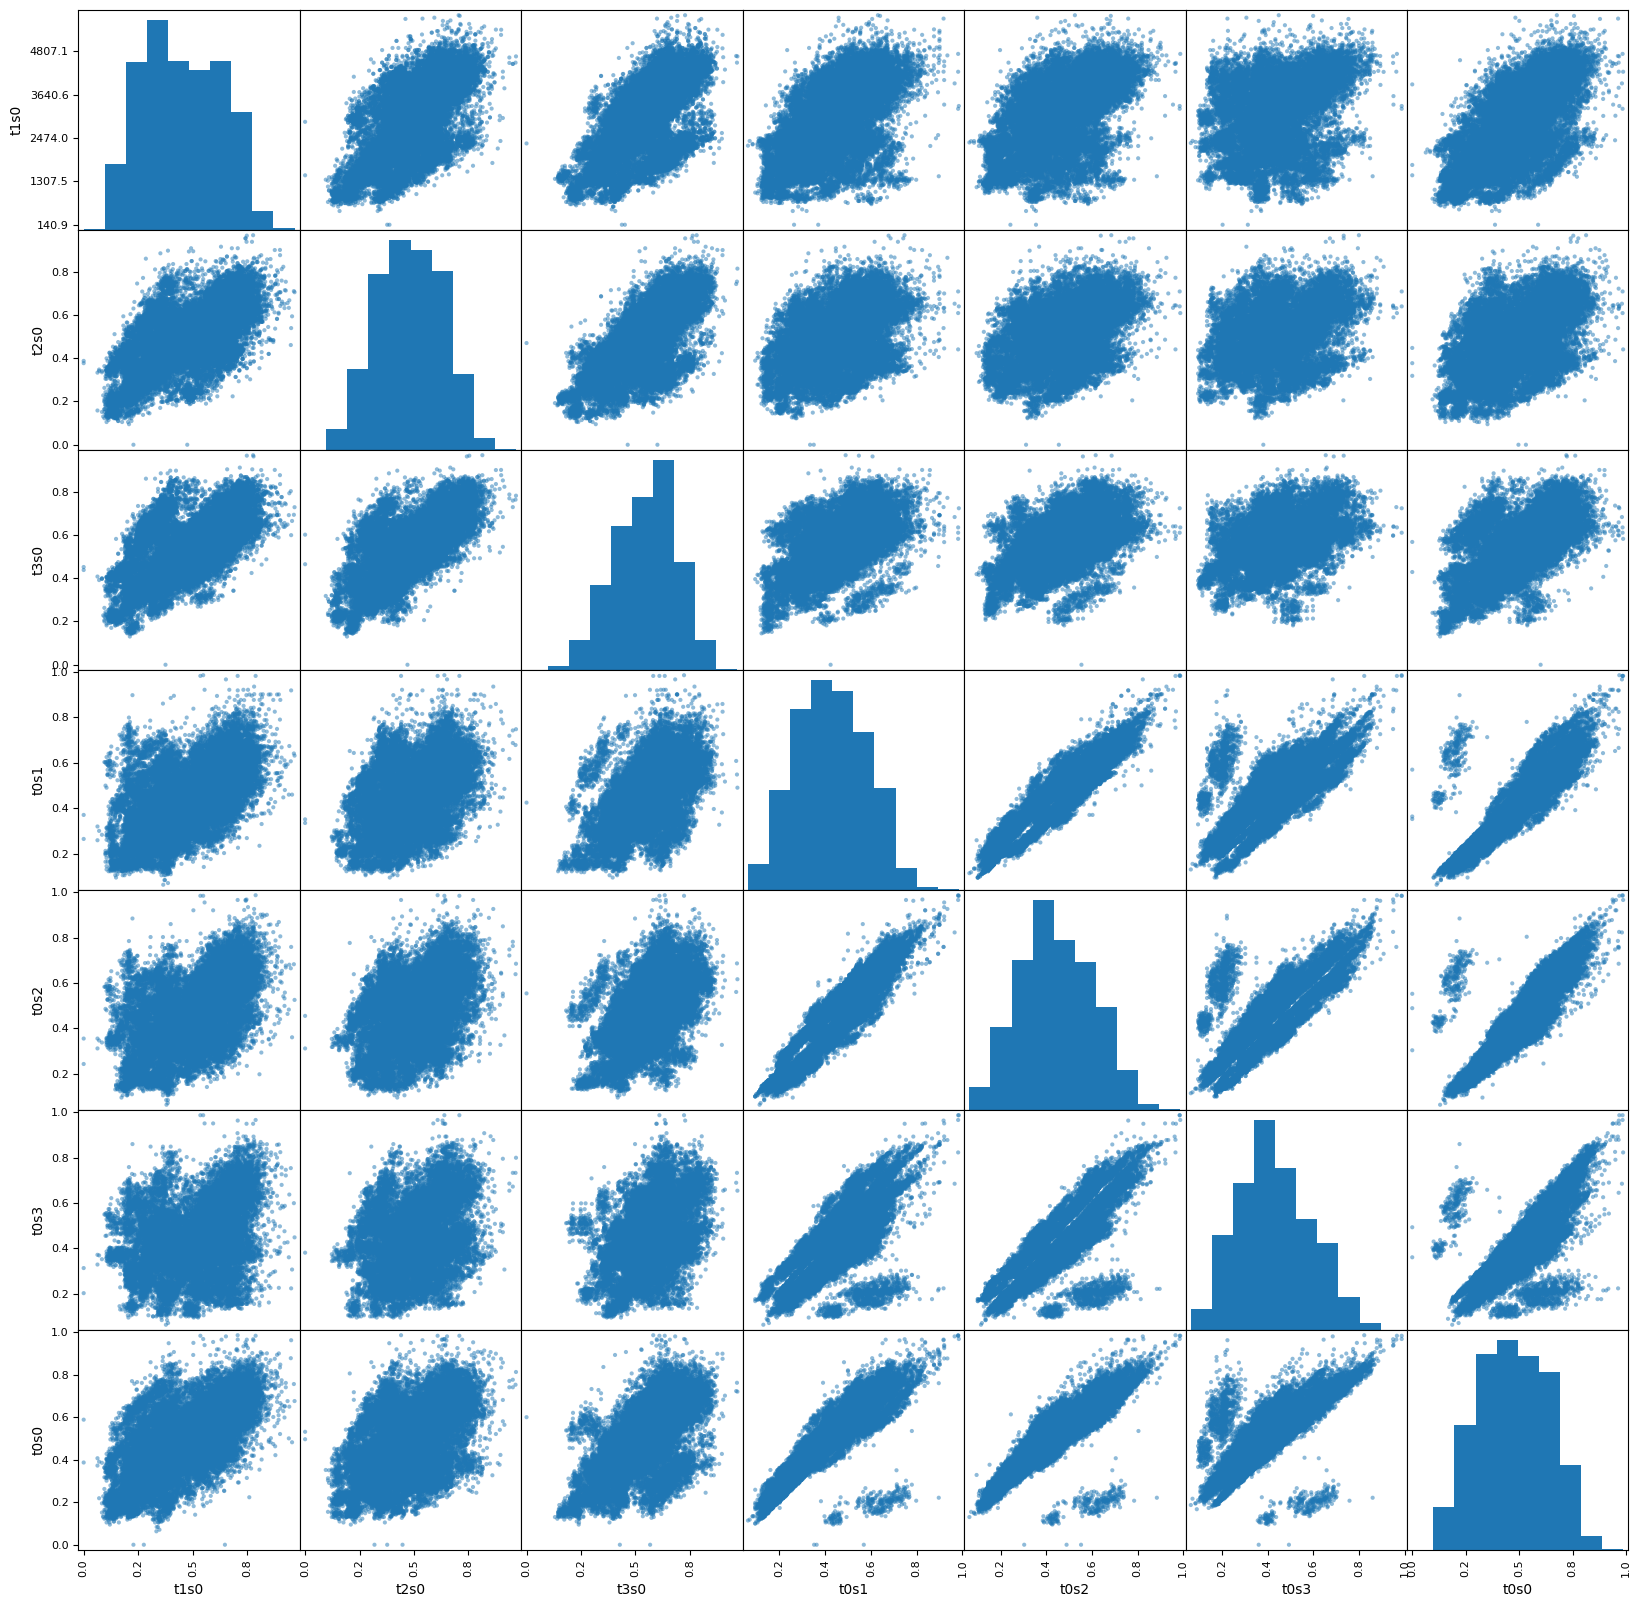

In [191]:
#apply sqrt transformation to lag features
df_train_sqrt = df_train.copy()

for feature in lag_features:
    df_train_sqrt[feature] = np.sqrt(df_train_sqrt[feature])

# Create the scatter matrix plot
plt.figure(figsize=(20, 20))
sm = scatter_matrix(df_train_sqrt[lag_features], figsize=(20, 20))

# Fix the axis labels to one decimal place
for ax in sm.ravel():
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}'))

plt.show()

<Figure size 2000x2000 with 0 Axes>

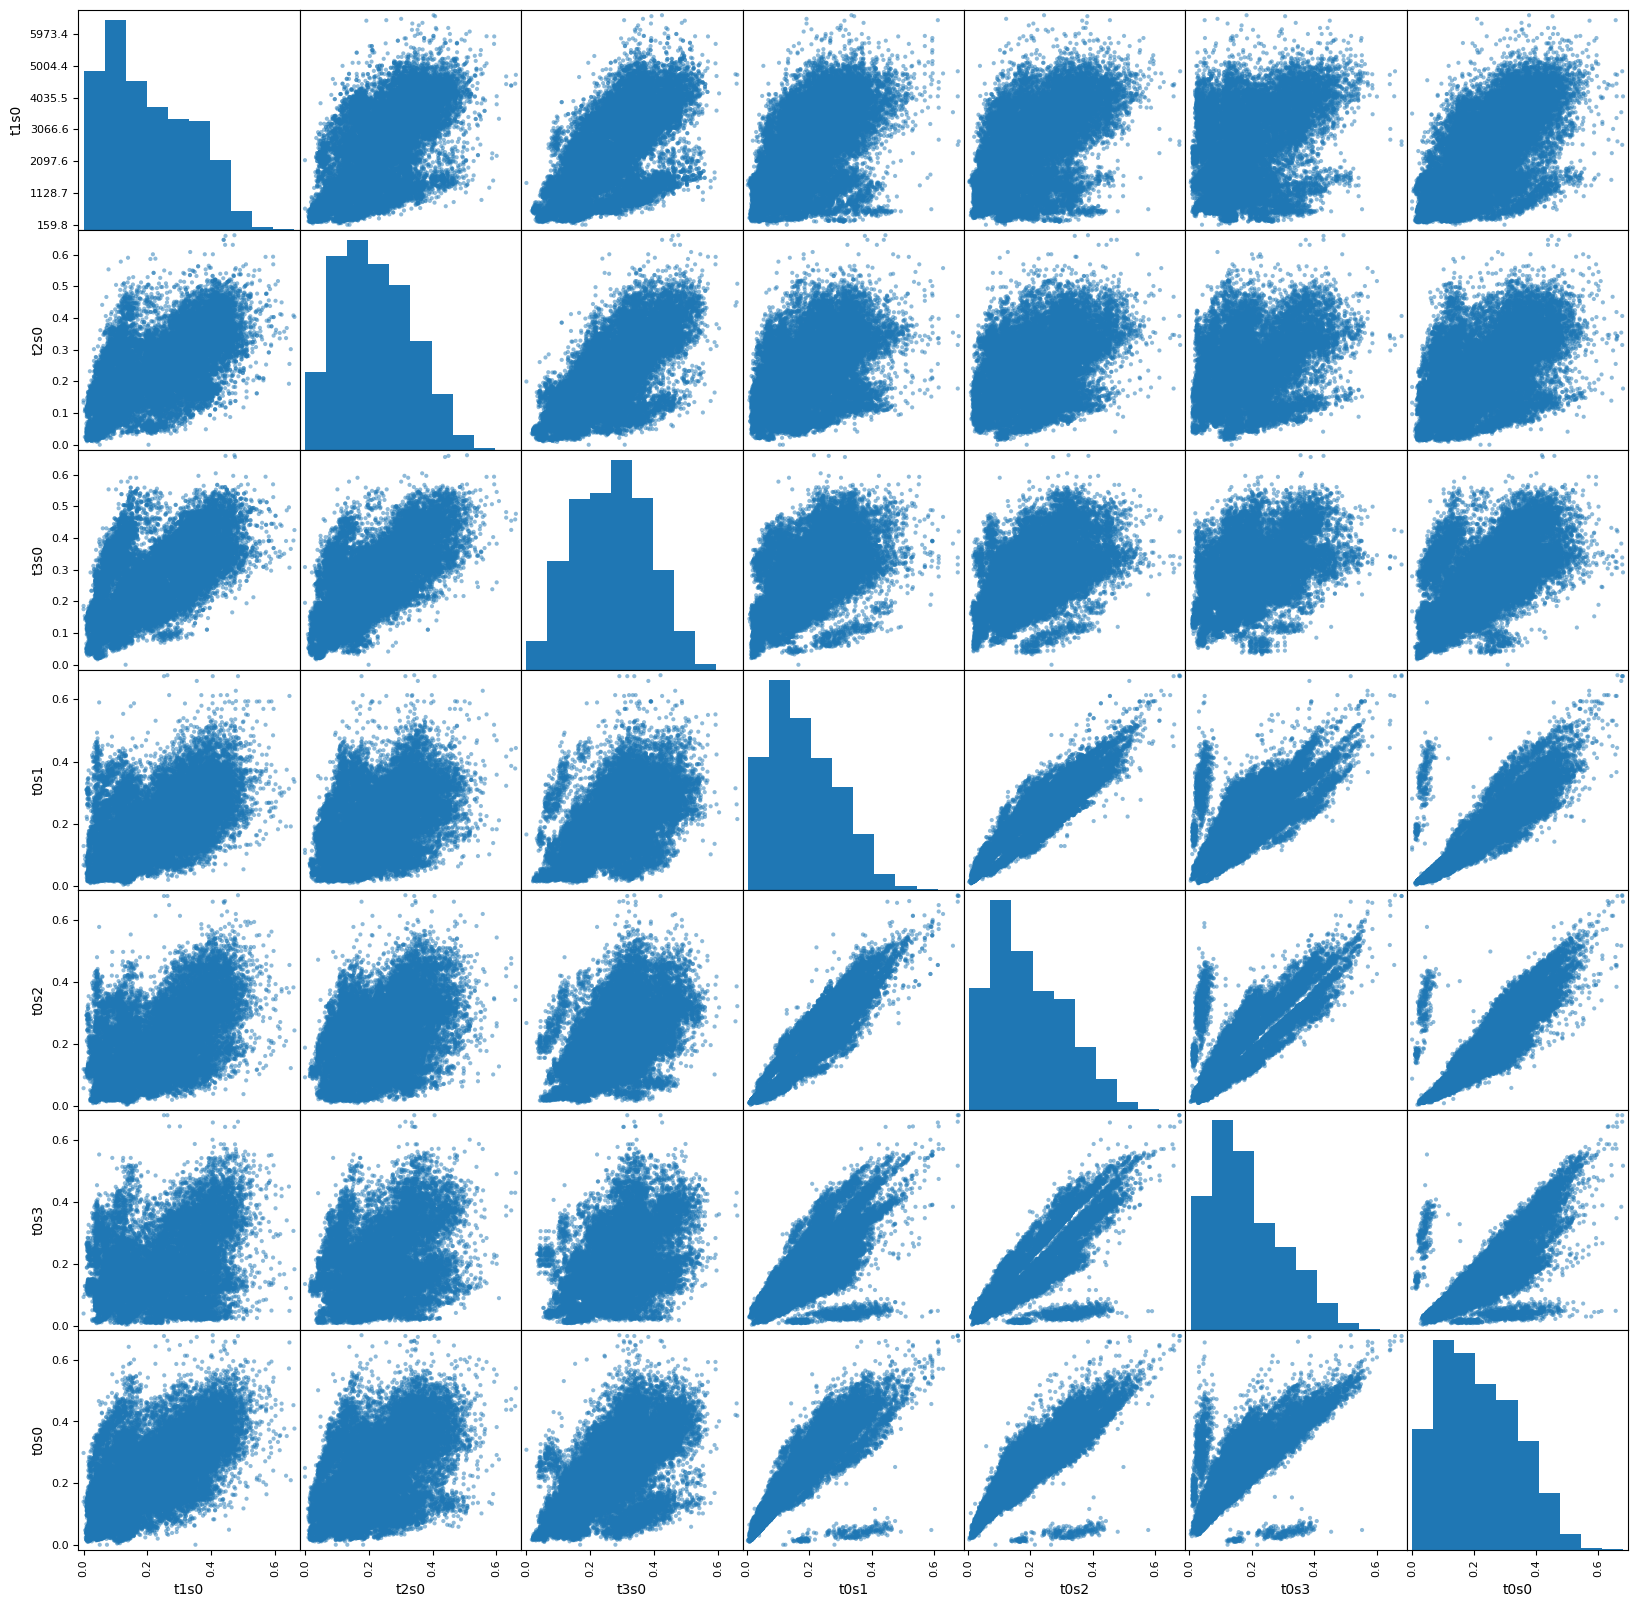

In [198]:
# apply log transformation to lag features
df_train_log = df_train.copy()

for feature in lag_features:
    df_train_log[feature] = np.log1p(df_train_log[feature])

# Create the scatter matrix plot
plt.figure(figsize=(20, 20))
sm = scatter_matrix(df_train_log[lag_features], figsize=(20, 20))

# Fix the axis labels to one decimal place
for ax in sm.ravel():
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}'))

plt.show()

In [201]:
import feature_engineering

corr = feature_engineering.get_features_correlated_to_target(df_train[lag_features], 't0s0')
corr_sqrt = feature_engineering.get_features_correlated_to_target(df_train_sqrt[lag_features], 't0s0')
corr_log = feature_engineering.get_features_correlated_to_target(df_train_log[lag_features], 't0s0')

# print avg
print('Average correlation:', np.mean(corr))
print('Average correlation (sqrt):', np.mean(corr_sqrt))
print('Average correlation (log):', np.mean(corr_log))

Average correlation: 0.7614285714285715
Average correlation (sqrt): 0.7657142857142858
Average correlation (log): 0.7628571428571428


In [304]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = df_train.copy()


class HourExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return pd.DataFrame(pd.to_datetime(X.iloc[:, 0], format='%H:%M:%S').dt.hour, columns=['hour'])


class StationAvgLagTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Compute the average occupancy rate for each station with respect to the 3 lag stations and the 3 lag trains
        cols = ['t1s0', 't2s0', 't3s0']
        stations_lag_train = df_train.groupby('station')[cols].mean()
        stations_avg_lag_train = stations_lag_train.mean(axis=1)

        cols = ['t0s1', 't0s2', 't0s3']
        stations_lag_station = X.groupby('station')[cols].mean()
        stations_avg_lag_station = stations_lag_station.mean(axis=1)

        X['station_avg_lag_train'] = X['station'].map(stations_avg_lag_train)
        X['station_avg_lag_station'] = X['station'].map(
            stations_avg_lag_station)
        return X


def sqrt_transform(X):
    return pd.DataFrame(np.sqrt(X), columns=X.columns)


transformer = ColumnTransformer(
    transformers=[
        ('hour', HourExtractor(), ['hour']),
    ],
    remainder='passthrough'
)

numeric_features = ['station_avg_lag_train',
                    'station_avg_lag_station', 'hour_num'] + lag_features

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])


# Create the pipeline
pipeline = Pipeline([
    ('transformer', transformer),
])
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('hour', HourExtractor(),
                                                  ['hour'])]))])

In [300]:
tra = pipeline.fit_transform(df)
tra

array([[6.0, '2019-01-07', 1, ..., 0.2395136876006441,
        0.37136601191768787, 0],
       [6.0, '2019-01-08', 1, ..., 0.2395136876006441,
        0.37136601191768787, 1],
       [6.0, '2019-01-10', 1, ..., 0.2395136876006441,
        0.37136601191768787, 3],
       ...,
       [8.0, '2019-05-15', 9, ..., 0.09990241545893719,
        0.14645073481141987, 2],
       [8.0, '2019-03-21', 9, ..., 0.09990241545893719,
        0.14645073481141987, 3],
       [8.0, '2019-01-30', 9, ..., 0.09990241545893719,
        0.14645073481141987, 2]], dtype=object)